## **Load data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%pwd
%cd 'gdrive/My Drive/bladder cancer'
%ls

/content/gdrive/My Drive/bladder cancer
'Baseline ECOG Score.png'  'tree_Baseline ECOG Score.dot'
'Immune phenotype.png'     'tree_Baseline ECOG Score.png'
 IMvigor210_clin.csv       'tree_Immune phenotype.dot'
 imvigor210.csv            'tree_Immune phenotype.png'
 IMvigor210.xlsx            tree_Sex.dot
 Race.png                   tree_Sex.png
'TCGA Subtype.dot'         'tree_TCGA Subtype.png'
 tmm.csv


In [603]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [604]:
# xlsx = pd.read_excel('./IMvigor210.xlsx', sheet_name = 'TMM norm' )
# xlsx.to_csv('./tmm.csv',index=False)
# print(xlsx.columns)
%ls

'Baseline ECOG Score.png'  'tree_Baseline ECOG Score.dot'
'Immune phenotype.png'     'tree_Baseline ECOG Score.png'
 IMvigor210_clin.csv       'tree_Immune phenotype.dot'
 imvigor210.csv            'tree_Immune phenotype.png'
 IMvigor210.xlsx            tree_Sex.dot
 Race.png                   tree_Sex.png
'TCGA Subtype.dot'         'tree_TCGA Subtype.png'
 tmm.csv


In [605]:
data = pd.read_csv("IMvigor210_clin.csv")
print(data.columns)
print(len(data))

Index(['SampleID', 'Best Confirmed Overall Response', 'binaryResponse',
       'Enrollment IC', 'IC Level', 'TC Level', 'Immune phenotype',
       'FMOne mutation burden per MB', 'Sex', 'Race',
       'Intravesical BCG administered', 'Baseline ECOG Score',
       'Tobacco Use History', 'Met Disease Status', 'Sample age', 'Tissue',
       'Received platinum', 'Sample collected pre-platinum',
       'Neoantigen burden per MB', 'sizeFactor', 'ANONPT_ID', 'os', 'censOS',
       'Lund', 'Lund2', 'TCGA Subtype'],
      dtype='object')
348


In [606]:
marker = pd.read_csv("tmm.csv")
ori_marker = marker 

In [607]:
marker.columns

Index(['Entrez Gene ID', 'Symbol', 'SAMf2ce197162ce', 'SAM698d8d76b934',
       'SAMc1b27bc16435', 'SAM85e41e7f33f9', 'SAMf275eb859a39',
       'SAM7f0d9cc7f001', 'SAM4305ab968b90', 'SAMcf018fee2acd',
       ...
       'SAMe7e4f7c076a7', 'SAMbe25e2c88f3e', 'SAM4caabd64e7fd',
       'SAMc6eff056c89a', 'SAM5cfa1699bdb7', 'SAMda4d892fddc8',
       'SAM3a1c9632ff7b', 'SAM8b4b8b0f9e73', 'SAMe3d4266775a9',
       'SAM2de7cffb5f72'],
      dtype='object', length=350)

## **Data Preprocessing**

In [608]:
marker = marker.rename(columns = {'Symbol':'SampleID'}) 
marker = marker.drop(['Entrez Gene ID'], axis = 1).T
marker.columns = marker.iloc[0]
marker = marker.drop(marker.index[0])

In [609]:
print(marker.head())

SampleID            A1BG      ADA     CDH2  ...    DGCR2 CASP8AP2     SCO2
SAMf2ce197162ce  3.97148  10.2378  9.12886  ...  9.76685  11.1387  10.2317
SAM698d8d76b934  6.19179  10.3348  13.7274  ...   9.8475  11.4952  10.4029
SAMc1b27bc16435  3.56082   9.1993  5.63238  ...   9.9633  10.9028  9.24281
SAM85e41e7f33f9  3.88137  11.7038  9.27618  ...  9.56163     11.8  11.1349
SAMf275eb859a39  4.90625  10.1602  7.49974  ...  10.2516   11.416  10.5975

[5 rows x 17692 columns]


In [610]:
len(marker), len(marker.columns)

(348, 17692)

In [611]:
target_column = 'Baseline ECOG Score'

In [612]:
## match non-digit labels to digits

# data['Best Confirmed Overall Response'] = data['Best Confirmed Overall Response'].map({'CR':0, 'PR':1, 'SD':2, 'PD':3, 'NE':4})
# data['Enrollment IC'] = data['Enrollment IC'].map({'IC0':0, 'IC1':1, 'IC2':2})

# NA = -1 -> nan 빼고 해보기
# data['Immune phenotype'] = data['Immune phenotype'].map({'desert':0, 'inflamed':1, 'excluded':2})

# data['Sex'] = data['Sex'].map({'M':0, 'F':1})
# # NA = -1, rm 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' since the number of it is 1
# data['Race'] = data['Race'].map({'BLACK OF AFRICAN AMERICAN':0, 'ASIAN':1, 'WHITE':2,  'OTHER':4})
# data['Race'] = data['Race'].fillna(-1)
# data['Intravesical BCG administered'] = data['Intravesical BCG administered'].map({'N':0, 'Y':1})
# data['Tobacco Use History'] = data['Tobacco Use History'].map({'NEVER':0, 'PREVIOUS':1, 'CURRENT':2})

# # # replace NA to the mean of N, Y
# # data['Met Disease Status'] = data['Met Disease Status'].map({'Liver':0, 'Visceral':1, 'LN Only':2, 'NA': -1})
# data['Sample age'] = data['Sample age'].map({'(less than) 1 year':0, '1-2 years':1, 'more than 2 years':2})
# data['Received platinum'] = data['Received platinum'].map({'N':0, 'Y':1})

# # replace NA to the mean of N, Y
# #data['Sample collected pre-platinum'] = data['Sample collected pre-platinum'].map({'N':0, 'Y':1, 'NA': 0.5})
# data['Lund'] = data['Lund'].map({'MS1a':0, 'MS1b':1, 'MS2a1':2,'MS2a2':3, 'MS2b1':4, 'MS2b2.1':5, 'MS2b2.2':6})
# data['Lund2'] = data['Lund2'].map({'UroA':0, 'UroB':1, 'Genomically unstable':3, 'Infiltrated':4, 'Basal/SCC-like':5})
# data['TCGA Subtype'] = data['TCGA Subtype'].map({'I':0, 'II':1, 'III':2, 'IV':3})     

# # replace NA to the mean of column 
# data['Neoantigen burden per MB'] = data['Neoantigen burden per MB'].fillna(data.mean()['Neoantigen burden per MB'])
# # replace NA to the mean of column 
# data['FMOne mutation burden per MB'] = data['FMOne mutation burden per MB'].fillna(data.mean()['FMOne mutation burden per MB'])

  

print(data[target_column])


0      0
1      1
2      0
3      2
4      0
      ..
343    0
344    0
345    0
346    0
347    1
Name: Baseline ECOG Score, Length: 348, dtype: int64


In [613]:
if target_column in marker.columns:
  marker = marker.drop(target_column, axis = 1)

In [614]:
data.index = data['SampleID']
marker.index.equals(data.index)

True

In [615]:
marker = marker.join(data[target_column])
marker = marker.reset_index()
marker = marker.rename(columns = {'index':'SampleID'}) 
marker.head()

,SampleID,A1BG,ADA,CDH2,AKT3,POU5F1P5,ZBTB11-AS1,MED6,NR2E3,NAALAD2,SNORD116-1,SNORD116-2,SNORD116-6,SNORD116-8,SNORD116-14,SNORD116-15,SNORD116-16,SNORD116-20,SNORD116-21,SNORD116-22,SNORD116-23,SNORD116-24,SNORD116-25,SNORD116-26,DDTL,NAALADL1,CDKN2B-AS1,SIGLEC14,ACOT8,ABI1,GNPDA1,KCNE3,ZBTB33,GTF2IP4,CDH3,TANK,POM121C,ZSCAN30,MCTS2P,SRA1,...,CDC25C,GOLGA5,HS3ST3B1,HS3ST3A1,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,TNFSF15,THRAP3,MED12,MED13,CDC34,NR1H4,NUP153,CCS,NR1D2,CLEC2B,RBX1,CDC42,DOP1B,FGFBP1,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2,Baseline ECOG Score
0,SAMf2ce197162ce,3.97148,10.2378,9.12886,10.7241,7.3897,1.97723,9.09632,3.4958,5.62838,7.31183,1.30374,5.93584,0,3.58678,4.57074,2.22395,5.39654,1.67944,4.88944,8.22823,9.25732,4.1006,3.58678,4.88944,5.49379,3.06064,5.91843,6.54731,11.8771,9.37369,7.51662,11.212,8.36947,12.9403,11.2477,10.4892,7.3897,7.3897,8.57512,...,8.09896,11.478,3.97148,1.67944,4.57074,7.35776,11.3895,10.9476,11.6579,10.884,11.4909,0.794389,5.39654,12.3514,13.1151,13.7472,9.89811,6.93271,13.7003,7.9484,11.3045,9.71611,10.6462,10.8268,12.176,3.18234,10.739,7.26438,8.34687,13.3753,11.5898,12.1645,15.7093,12.7483,13.4474,2.61833,9.76685,11.1387,10.2317,0
1,SAM698d8d76b934,6.19179,10.3348,13.7274,11.8855,5.76731,1.77834,9.5023,2.08421,4.70671,8.59474,2.55106,6.64144,3.05154,5.06196,4.03492,2.08421,6.79668,3.52749,5.76731,9.38659,10.162,5.09653,5.06196,4.91475,5.83029,2.73785,6.79668,6.17571,11.2499,9.61986,5.48368,10.9472,8.09806,11.7468,10.5575,10.8127,8.34448,6.78613,8.94704,...,8.45185,11.6639,2.73785,2.33644,8.20094,5.53499,11.3293,11.0412,10.4973,11.462,9.473,2.08421,4.66125,13.0605,12.9927,12.7929,10.7407,1.38968,13.4348,8.98674,9.88259,8.48158,10.9961,10.8606,11.704,0,11.0561,9.30764,8.30807,12.5417,12.284,11.7372,13.5991,11.7458,12.0886,3.05154,9.8475,11.4952,10.4029,1
2,SAMc1b27bc16435,3.56082,9.1993,5.63238,9.97882,6.66971,3.32203,9.37385,1.4855,2.67817,8.15695,5.46609,7.31662,1.4855,5.34352,5.52367,4.80746,6.44967,0,6.56388,8.9118,9.17254,5.06189,5.06189,6.00011,3.03572,1.4855,6.25938,7.4414,11.5368,9.45749,6.47908,11.7335,8.96474,10.8795,11.4194,10.5753,6.59107,6.74427,8.13864,...,8.21054,11.9173,2.20172,2.20172,3.03572,7.92017,11.6381,11.3752,12.2196,10.6882,12.2071,5.4061,5.91659,12.7454,13.22,13.8861,10.8878,4.80746,12.7835,7.67536,11.7918,8.64613,10.6156,11.7456,12.3472,0,10.2373,7.30024,7.98311,12.9666,11.4569,11.3791,15.5232,11.8236,13.9629,0,9.9633,10.9028,9.24281,0
3,SAM85e41e7f33f9,3.88137,11.7038,9.27618,11.1349,6.1579,2.14869,9.15104,2.14869,4.37483,5.17796,1.83822,4.25019,0,1.44208,2.14869,0,4.18359,0.894188,2.97609,6.45475,7.85234,2.62091,0.894188,0,3.96307,3.26087,7.46765,7.03894,11.7277,9.04951,5.89196,10.9337,8.06153,15.0576,11.6926,10.9132,8.58143,6.64003,8.98985,...,8.31591,11.5379,4.04038,3.79478,4.43333,6.56352,11.9468,11.3846,10.735,12.0241,8.93776,2.97609,6.53708,12.8946,12.8183,13.1813,9.78585,5.27712,13.4875,8.36933,9.70505,10.8748,10.624,10.7878,11.3934,8.60389,11.0416,9.57793,9.00198,12.6481,12.1515,12.3973,15.1202,13.0617,12.9823,2.62091,9.56163,11.8,11.1349,2
4,SAMf275eb859a39,4.90625,10.1602,7.49974,9.62024,6.76629,1.88613,9.12538,3.71523,5.79708,8.12622,2.82109,5.50751,4.2631,5.14484,4.36101,3.474,6.42522,0,5.46411,8.93584,9.34167,4.53888,4.77031,0,4.45268,3.073,5.14484,6.12431,12.0255,10.8691,5.83165,11.1274,9.25041,12.9814,12.0055,10.701,7.97208,6.73011,8.78306,...,6.37923,12.2804,3.63921,0,2.67646,9.09547,12.0987,11.1265,11.3188,12.1944,12.4287,3.18417,8.66583,12.7132,12.5897,13.3354,9.63744,2.67646,12.9693,8.04386,11.8697,12.2113,10.6119,11.4677,11.5236,3.18417,10.7544,9.09369,7.83399,13.2014,12.3724,12.4545,15.2666,13.831,13.0864,2.12781,10.2516,11.416,10.5975,0


In [616]:
marker.index

RangeIndex(start=0, stop=348, step=1)

In [617]:
marker = marker.dropna(axis=0)
marker.shape

(348, 17694)

In [618]:
marker.reset_index(inplace=True, drop=True)
marker.index

RangeIndex(start=0, stop=348, step=1)

In [619]:
######17694 check
marker.shape

(348, 17694)

In [620]:
## split train and test data

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)

for train_idx, test_idx in split.split(marker, marker[target_column]):
    train = marker.loc[train_idx]
    test = marker.loc[test_idx]

print(len(train), len(test))

278 70


In [621]:
print(train.groupby(target_column).size())
print(test.groupby(target_column).size()) 

Baseline ECOG Score
0    107
1    157
2     14
dtype: int64
Baseline ECOG Score
0    27
1    39
2     4
dtype: int64


In [622]:
###check 

In [623]:
## encode y to one-hot vector

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

decoded_y_train = train[target_column]
Y = encoder.fit_transform(decoded_y_train)
y_train = pd.get_dummies(Y).values

decoded_y_test = test[target_column]
Y = encoder.fit_transform(decoded_y_test)
y_test = pd.get_dummies(Y).values

x_train = train.drop([target_column], axis = 1)
x_test = test.drop([target_column], axis = 1)

In [624]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((278, 17693), (70, 17693), (278, 3), (70, 3))

In [625]:
# number of class
y_train.shape[1]

3

In [626]:
features = marker.columns.tolist()
features.remove(target_column)
features.remove('SampleID')
len(features)

17692

In [627]:
x_train.set_index(x_train['SampleID'], inplace=True, drop=True)
x_test.set_index(x_test['SampleID'], inplace=True, drop=True)

x_train.drop(['SampleID'], axis=1, inplace=True)
x_test.drop(['SampleID'], axis=1, inplace=True)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [628]:
x_train

,A1BG,ADA,CDH2,AKT3,POU5F1P5,ZBTB11-AS1,MED6,NR2E3,NAALAD2,SNORD116-1,SNORD116-2,SNORD116-6,SNORD116-8,SNORD116-14,SNORD116-15,SNORD116-16,SNORD116-20,SNORD116-21,SNORD116-22,SNORD116-23,SNORD116-24,SNORD116-25,SNORD116-26,DDTL,NAALADL1,CDKN2B-AS1,SIGLEC14,ACOT8,ABI1,GNPDA1,KCNE3,ZBTB33,GTF2IP4,CDH3,TANK,POM121C,ZSCAN30,MCTS2P,SRA1,SNORD12B,...,AMMECR1,CDC25C,GOLGA5,HS3ST3B1,HS3ST3A1,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,TNFSF15,THRAP3,MED12,MED13,CDC34,NR1H4,NUP153,CCS,NR1D2,CLEC2B,RBX1,CDC42,DOP1B,FGFBP1,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
0,5.57353,9.21834,8.87672,10.7659,6.95114,1.5375,8.79873,2.74604,7.07847,9.51326,3.39431,7.19547,3.51929,7.19547,7.05801,3.6343,7.8354,4.68582,7.30369,10.0091,11.5085,5.35618,5.76238,0,4.575,0.964549,7.12838,6.83571,11.723,8.52458,6.40476,10.9637,9.20909,11.9338,11.7315,10.6997,8.31644,7.23245,9.05504,2.93738,...,7.92849,7.42846,11.3603,4.39098,3.10628,2.52538,6.90607,11.8291,11.0104,11.6103,11.8362,10.9575,5.81209,5.57353,12.6749,12.7112,13.1742,9.37332,7.67674,12.7792,8.20921,10.7063,8.92553,9.92404,11.1997,12.3994,1.5375,10.5254,8.84722,7.65647,12.9938,12.2394,11.1205,14.9603,12.4181,12.6278,2.52538,9.55401,11.5891,10.1809
1,4.72363,10.6455,6.93175,9.94408,6.05658,2.94295,9.94506,0,9.38653,5.49674,0.738967,4.09217,0.738967,2.11932,2.81164,0,2.81164,0,3.54889,6.39152,6.97074,2.81164,3.17437,0.738967,3.84595,2.94295,7.46713,6.37998,11.5838,9.62276,6.25917,10.8481,8.5937,11.0753,10.8813,10.8497,7.57736,6.4256,9.408,1.5883,...,7.98797,8.16317,11.7268,5.88756,5.87116,3.62908,6.29649,12.5216,11.0104,10.3355,11.3594,11.7774,4.52834,5.13414,12.7636,13.0903,13.1589,10.4641,2.66717,14.2821,8.02179,10.1061,9.04116,10.719,11.0038,12.3969,1.22525,10.9096,9.77923,8.89068,12.8452,12.085,11.576,12.1831,12.0316,13.4213,0,9.15727,11.5385,11.0405
2,5.25276,8.39237,6.32976,10.8597,6.54515,2.62774,9.41598,2.62774,6.39042,9.56977,4.12145,7.60295,2.98321,5.836,6.43429,4.38259,7.93362,2.98321,7.17322,10.2792,11.2265,5.81403,5.81403,0,3.88898,5.11577,5.25276,6.53175,11.9306,9.18937,5.74603,10.2901,8.99311,9.88376,11.096,10.9156,7.97381,6.98938,7.92851,3.71018,...,7.15586,7.41866,12.0426,3.88898,2.41065,4.60363,7.1471,11.629,10.7854,11.0231,12.0266,10.9462,7.75485,8.11529,12.5182,12.9978,13.71,9.85849,8.54023,13.1809,7.9886,12.3014,8.7045,10.3563,11.205,12.0788,0.897961,11.0966,9.1915,8.23589,13.1333,11.9242,12.0968,15.6261,12.4753,14.5103,0.897961,9.88244,10.994,11.2003
3,5.56811,9.22251,8.57232,11.3214,5.67606,3.06554,9.63338,4.33391,7.20652,7.58444,3.29957,5.97553,3.6775,4.89483,5.27039,5.2142,6.1653,2.43912,5.87037,8.88057,10.1806,4.74424,4.53079,2.623,4.704,4.33391,6.13536,7.03872,11.3168,8.96387,6.60838,10.2504,8.36215,9.02231,10.3893,10.6224,8.02915,6.26547,8.20163,2.43912,...,7.29044,7.42029,12.1208,3.9767,2.623,5.45143,7.79063,11.2736,11.0105,11.2185,11.2809,9.42329,5.2142,5.59036,12.4687,12.7572,13.0223,10.4027,9.40615,12.745,8.21601,11.1216,9.16253,10.7501,11.0456,11.8084,0.796751,10.4999,8.20163,8.04535,12.7526,11.8528,11.5271,11.214,13.128,12.9859,2.78607,9.673,11.1814,9.98254
4,5.42268,8.42143,6.98504,9.74083,6.94636,1.41993,9.17356,1.41993,6.82367,8.63108,2.94541,6.84486,3.46655,5.47797,5.42268,2.1215,6.71281,1.41993,6.61754,9.3432,10.0522,4.00734,4.70797,0,4.50998,2.1215,5.93844,6.59271,11.9381,9.9965,7.33869,10.2054,10.0012,12.8195,11.7196,10.9946,7.39723,6.82367,8.8407,3.46655,...,8.27302,7.39723,11.8873,2.94541,0,2.1215,6.73567,11.8745,11.0029,11.5486,11.5275,11.5176,5.77145,7.004,12.5016,12.9911,13.1801,9.56687,7.7515,13.0803,8.17605,11.2729,7.86991,10.7129,11.7289,12.1476,0,9.98939,7.39723,7.80653,13.2159,11.5299,11.391,16.0085,12.4541,13.246,3.84858,9.78808,10.5659,10.1702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [629]:
x_test = np.asarray(x_test).astype(np.float32)
x_train = np.asarray(x_train).astype(np.float32)

# **Neural Networks**

In [640]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers


model = Sequential()

model.add(Dense(64, input_shape=(len(features),), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer='l1'))
model.add(Dense(y_train.shape[1], activation='softmax'))

opt = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy']) 


model.summary()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=800)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 64)                1132352   
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_73 (Dense)             (None, 3)                 195       
Total params: 1,136,707
Trainable params: 1,136,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
9/9 [==============================] - 0s 17ms/step - loss: 6.7736 - accuracy: 0.4101 - val_loss: 6.1179 - val_accuracy: 0.5143
Epoch 2/800
9/9 [==============================] - 0s 5ms/step - loss: 6.2214 - accuracy: 0.4928 - va

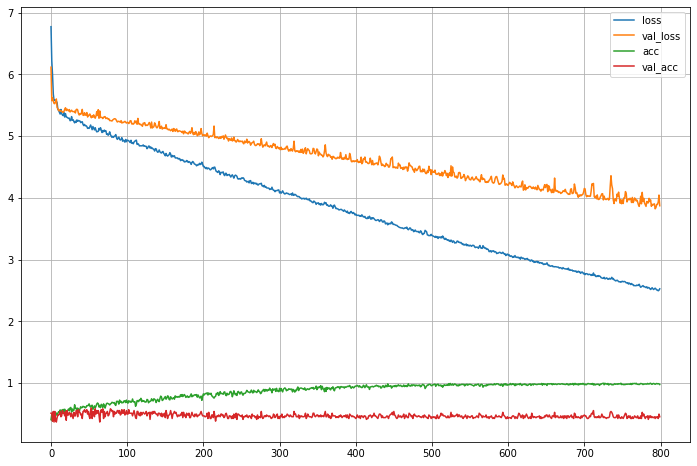

In [641]:
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['recall'])
# plt.plot(hist.history['precision'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
#plt.legend(['loss','val_loss', 'acc','val_acc', 'recall', 'precision'])
plt.grid()
plt.show()

In [642]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy = {:.3f}".format(accuracy))

3/3 [==============================] - 0s 2ms/step - loss: 3.8740 - accuracy: 0.4571
Accuracy = 0.457


In [643]:
prediction = model.predict(x_test, verbose=1)
prediction.shape

3/3 [==============================] - 0s 2ms/step


(70, 3)

In [644]:
one_pred = np.zeros_like(prediction)
one_pred[np.arange(len(prediction)), prediction.argmax(1)] = 1
# one_pred

In [645]:
# one_pred

In [646]:
marker.groupby(target_column).size()

Baseline ECOG Score
0    134
1    196
2     18
dtype: int64

In [647]:
one_pred.shape

(70, 3)

In [648]:
from keras import backend as K
import tensorflow as tf

def result(one_pred):
  for target_class in range(y_train.shape[1]):
    """RECALL"""

    tp = K.sum(one_pred[:, target_class] * y_test[:, target_class])  #dtype=float32
    tpfn = tf.cast(K.sum(y_test[:, target_class]), tf.float32)  #uint8 to float32

    # Recall =  (True Positive) / (True Positive + False Negative)
    recall = tp / (tpfn + K.epsilon())

    """PRECISION"""

    tpfp = tf.cast(K.sum(one_pred[:, target_class]), tf.float32)

    # Precision = (True Positive) / (True Positive + False Positive)
    precision = tp / (tpfp + K.epsilon())

    """Accuracy"""
    tn = np.sum((one_pred[:, target_class]==0) * (y_test[:, target_class]==0).T)

    accuracy = (tp + tn)/(tpfn + tpfp - tp + tn)

    print("\nclass: ", target_class)
    print("tp: ", tp)
    print("tp+fn: ", tpfn)
    print("tp+fp: ", tpfp)

    tf.print("Accuracy = {:.3f}".format(accuracy))
    tf.print("Recall = {:.3f}".format(recall))
    tf.print("Precision = {:.3f} ".format(precision))

In [649]:
result(one_pred)


class:  0
tp:  tf.Tensor(6.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(27.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(20.0, shape=(), dtype=float32)
Accuracy = 0.500
Recall = 0.222
Precision = 0.300 

class:  1
tp:  tf.Tensor(26.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(39.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(50.0, shape=(), dtype=float32)
Accuracy = 0.471
Recall = 0.667
Precision = 0.520 

class:  2
tp:  tf.Tensor(0.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(4.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy = 0.943
Recall = 0.000
Precision = 0.000 


# **SVM**

In [573]:
# Support Vector Classifier

from sklearn.svm import SVC

# C=slack variable weight
# 데이터가 선형분리가 불가능한 경우, 슬랙변수로 개별적인 오차를 허용한다. 
svm = SVC(kernel='linear', C=10, random_state=0)

svm.fit(x_train, decoded_y_train)
y_pred_svc = svm.predict(x_test)

print(y_pred_svc)

# encode y_pred_svc to one-hot vector 
Y = encoder.fit_transform(y_pred_svc)
y_pred_svc = pd.get_dummies(Y).values.astype(np.float32)

[0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1]


In [574]:
# number of supports
svm.n_support_

array([106, 147,  14], dtype=int32)

In [575]:
x_train.shape

(278, 17692)

In [576]:
y_pred_svc.shape

(70, 2)

In [577]:
# output개수가 0인 class가 있을 때 add [0]*y_pred_svc.shape[0]

new_column = [0] * y_pred_svc.shape[0]
y_pred_svc = np.insert(y_pred_svc, 2, new_column, axis=1)
# y_pred_svc

In [578]:
result(y_pred_svc)


class:  0
tp:  tf.Tensor(9.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(27.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(25.0, shape=(), dtype=float32)
Accuracy = 0.514
Recall = 0.333
Precision = 0.360 

class:  1
tp:  tf.Tensor(24.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(39.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(45.0, shape=(), dtype=float32)
Accuracy = 0.486
Recall = 0.615
Precision = 0.533 

class:  2
tp:  tf.Tensor(0.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(4.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy = 0.943
Recall = 0.000
Precision = 0.000 


#**PCA**#


In [579]:
from sklearn.preprocessing import StandardScaler

# drop_col = [target_column, 'SampleID'] 
drop_col = ['Symbol', 'Entrez Gene ID']

marker = ori_marker
x = marker.drop(drop_col, axis=1).values
# print(x)
y = data.loc[:,[target_column]].values
# y = data[target_column].values

x = StandardScaler().fit_transform(x)
# x

In [580]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PCs = pca.fit_transform(x)

# pc_col = (range(2))
df = pd.DataFrame(data= PCs, columns= ['PC'+str(i) for i in range(1,3)])

In [581]:
df.head()

,PC1,PC2
0,-18.007618,-2.229634
1,6.814461,-2.831940
2,-0.556562,-5.816019
3,12.094712,-3.792816
4,-8.793720,0.558942


In [582]:
df.shape

(17692, 2)

In [583]:
y.shape

(348, 1)

In [584]:
pca.explained_variance_ratio_

array([0.88398333, 0.01437193])

In [585]:
sum(pca.explained_variance_ratio_)

0.8983552654839544

In [586]:
no_dup_df = data.drop_duplicates(subset=target_column)
target_val = no_dup_df[target_column].dropna(axis=0).tolist()
# target_val = no_dup_df[target_column].tolist()
target_val

[0, 1, 2]

In [587]:
# target_val.count(2)

In [588]:
data[target_column].reset_index(drop=True, inplace=True)

In [589]:
data[target_column]

0      0
1      1
2      0
3      2
4      0
      ..
343    0
344    0
345    0
346    0
347    1
Name: Baseline ECOG Score, Length: 348, dtype: int64

In [590]:
pc_target_df = pd.concat([df, data[target_column]], axis=1)

In [591]:
pc_target_df

,PC1,PC2,Baseline ECOG Score
0,-18.007618,-2.229634,0.0
1,6.814461,-2.831940,1.0
2,-0.556562,-5.816019,0.0
3,12.094712,-3.792816,2.0
4,-8.793720,0.558942,0.0
...,...,...,...
17687,26.654628,0.310248,NaN
17688,-33.653293,0.816036,NaN
17689,9.230771,1.139267,NaN
17690,16.517924,0.205288,NaN


In [592]:
pc_target_df.shape

(17692, 3)

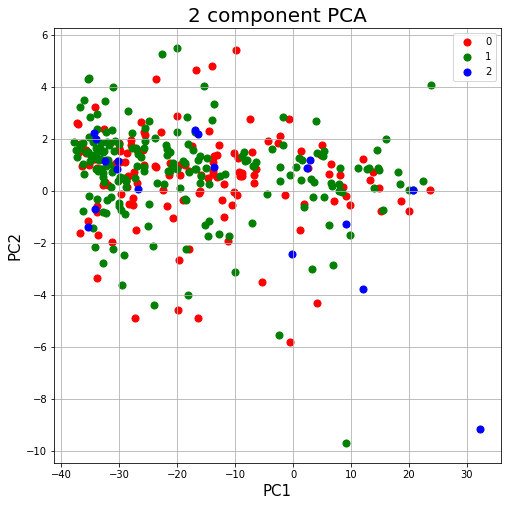

In [593]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)


colors = ['r', 'g', 'b']
for target, color in zip(target_val, colors):
    indicesToKeep = pc_target_df[target_column] == target
    ax.scatter(pc_target_df.loc[indicesToKeep, 'PC1']
               , pc_target_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(target_val)
ax.grid()

In [594]:
pca2 = PCA(n_components=3)
PCs2 = pca2.fit_transform(x)
df2= pd.DataFrame(data = PCs2
             , columns = ['PC'+str(i) for i in range(1,4)])

pc_target_df2 = pd.concat([df2, data[target_column]], axis=1)

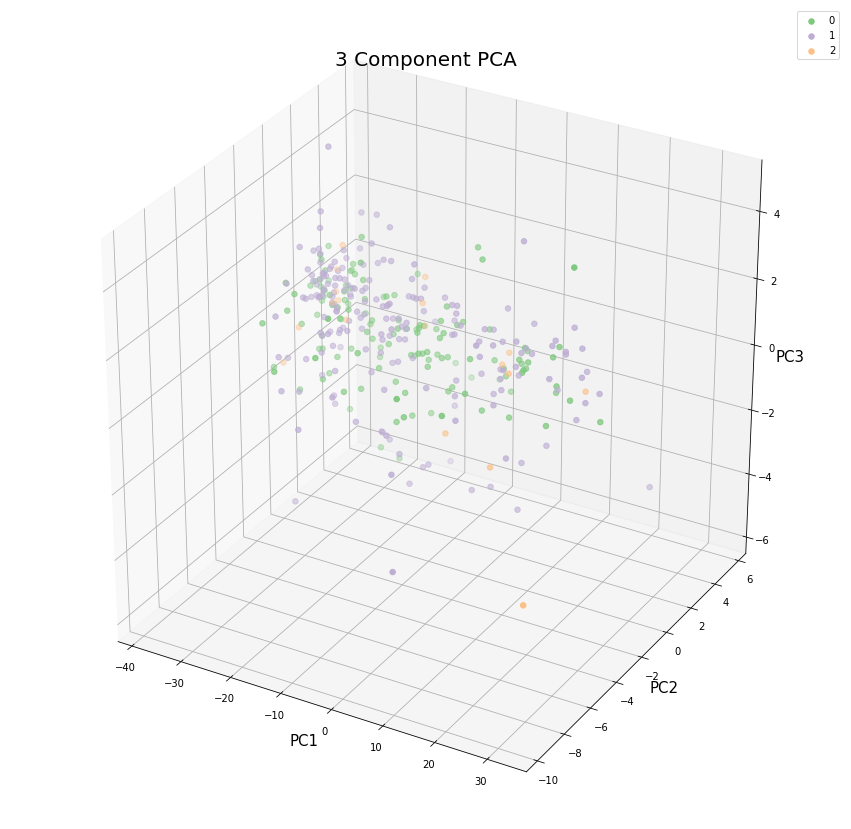

In [595]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('PC1', fontsize = 15)
ax2.set_ylabel('PC2', fontsize = 15)
ax2.set_zlabel('PC3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4","#fdc086","#ffff99","#386cb0","#f0027f","","#666666"]
for target, color in zip(target_val, colors):
  indicesToKeep = pc_target_df2[target_column] == target
  ax2.scatter(pc_target_df2.loc[indicesToKeep, 'PC1']
               , pc_target_df2.loc[indicesToKeep, 'PC2']
               , pc_target_df2.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 30)

ax2.legend(target_val)
ax2.grid()